In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = np.asarray(pd.read_csv("training_data.csv"))
y_train = np.asarray(pd.read_csv("training_label.csv"))
X_test = np.asarray(pd.read_csv("testing_data.csv"))
y_test = np.asarray(pd.read_csv("testing_label.csv"))

In [3]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

In [4]:
# normalize data (Min-Max Normalization)

In [5]:
def noramlization(data):
    minVals = data.min(0)
    maxVals = data.max(0)
    ranges = maxVals - minVals
    normData = np.zeros(np.shape(data))
    m = data.shape[0]
    normData = data - np.tile(minVals, (m, 1))
    normData = normData/np.tile(ranges, (m, 1))
    return normData

In [41]:
# def Z_ScoreNormalization(X):
#     for i in range(X.shape[1]):
#         for j in range(X.shape[0]):
#             X[j,i] = (X[j,i] - np.mean(X[:,i])) / np.std(X[:,i])
#     return X

In [6]:
X_train = noramlization(X_train)
X_test = noramlization(X_test)

In [7]:
# First let's try the simple least square problem  

# Least square solution 

In [8]:
w_opt = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
print(w_opt)

[[ 0.1116384 ]
 [ 0.09965056]
 [ 0.95537654]
 [-0.0418559 ]
 [-0.50626446]
 [ 0.19237256]
 [-0.13106946]
 [-0.06061458]
 [-0.04585082]
 [-0.54651914]
 [ 0.08322795]
 [ 1.0808357 ]]


In [9]:
y_hat = np.sign(X_test@w_opt)

In [10]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_test))]

print('Errors: '+ str(sum(error_vec)))
print('Error rate :')
print(sum(error_vec)/len(y_test))

Errors: 81
Error rate :
0.5225806451612903


In [11]:
# Let's add one bias for train and test data  

In [12]:
X_train1 = np.hstack((X_train, np.ones((n_train,1))))
X_test1 = np.hstack((X_test, np.ones((n_test,1))))

In [13]:
w_opt1 = np.linalg.inv(X_train1.T@X_train1)@X_train1.T@y_train
print(w_opt1)

[[ 0.10496047]
 [ 0.15358405]
 [ 0.99141339]
 [-0.03223689]
 [ 0.26803307]
 [ 0.09347687]
 [-0.14054122]
 [-0.20505733]
 [ 0.08603934]
 [-0.36125935]
 [ 0.14161628]
 [ 0.97718247]
 [-0.8185441 ]]


In [14]:
y_hat = np.sign(X_test1@w_opt1)

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_test))]

print('Errors: '+ str(sum(error_vec)))
print('Error rate :')
print(sum(error_vec)/len(y_test))

Errors: 77
Error rate :
0.4967741935483871


In [19]:
# As we can see the result seems not good 

In [20]:
# Let's try the LASSO regression and Ridge regression 

# Ridge Regression 

In [15]:
n_train = len(X_train)
n_train

362

In [16]:
k_fold = 6
id_train = [[]] * k_fold
id_val = [[]] * k_fold

for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [17]:
Err_rate = []
Sq_err = []
Be_lam = []

In [18]:
lam_vals = np.logspace(-10,1, num=30)
print("lambda:",lam_vals)

lambda: [1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]


In [19]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_train[id_train[m]]
    y_train_r = y_train[id_train[m]]
    X_val_r = X_train[id_val[m]]
    y_val_r = y_train[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    Error_rate_low = 100
    for i in range(len(lam_vals)):
        W_ridge = np.linalg.inv(X_train_r.T@X_train_r+lam_vals[i]*np.identity(X_train_r.shape[1]))@ X_train_r.T @y_train_r
        y_hat = np.sign(X_val_r @ W_ridge)
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_lam = lam_vals[i]
            best_w = W_ridge
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Err_rate.append(err_rate)
    Sq_err.append(sq_err)
    Be_lam.append(best_lam)
    
    print("Validation accuracy:", (1-err_rate)*100,"%")


 iteration 0
Validation accuracy: 55.73770491803278 %

 iteration 1
Validation accuracy: 50.81967213114754 %

 iteration 2
Validation accuracy: 48.33333333333333 %

 iteration 3
Validation accuracy: 55.00000000000001 %

 iteration 4
Validation accuracy: 55.00000000000001 %

 iteration 5
Validation accuracy: 44.99999999999999 %


In [20]:
print("The Ridge regression result:\n")
print("The error rate of each validation:\n",Err_rate)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best lambda value of each validation:\n",Be_lam)
print("\n")
print("The average number of misclassifications rate:\n",sum(Err_rate)/len(Err_rate))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Ridge regression result:

The error rate of each validation:
 [0.4426229508196721, 0.4918032786885246, 0.5166666666666667, 0.45, 0.45, 0.55]


The mean squared error of each validation:
 [1.7704918032786885, 1.9672131147540983, 2.066666666666667, 1.8, 1.8, 2.2]


The best lambda value of each validation:
 [1e-10, 1.7433288221999872, 4.175318936560392, 4.175318936560392, 10.0, 0.3039195382313195]


The average number of misclassifications rate:
 0.4835154826958106


The mean squared error:
 1.9340619307832423


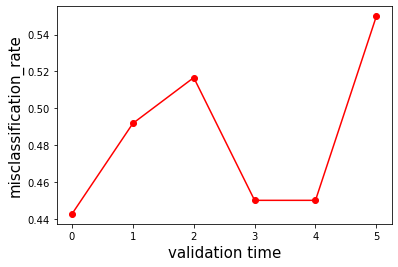

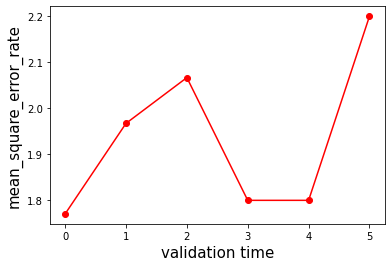

In [21]:
plt.plot(Err_rate,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("misclassification_rate", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()

# LASSO Regression 

In [22]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [23]:
Err_rate = []
Sq_err = []
Be_lam = []

lam_vals = np.logspace(-10,1, num=30)
print("lambda:",lam_vals)

lambda: [1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]


In [24]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_train[id_train[m]]
    y_train_r = y_train[id_train[m]]
    X_val_r = X_train[id_val[m]]
    y_val_r = y_train[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    W_lasso = ista_solve_hot(X_train_r,y_train_r,lam_vals)
    Error_rate_low = 100
    for i in range(W_lasso.shape[1]):
        y_hat = np.sign(X_val_r @ W_lasso[:,i]).reshape(y_val_r.shape[0],1)   
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_lam = lam_vals[i]
            best_w = W_lasso[:,i]
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Err_rate.append(err_rate)
    Sq_err.append(sq_err)
    Be_lam.append(best_lam)
    
    print("Validation accuracy:", (1-err_rate)*100,"%")


 iteration 0
Validation accuracy: 63.934426229508205 %

 iteration 1
Validation accuracy: 49.18032786885246 %

 iteration 2
Validation accuracy: 40.0 %

 iteration 3
Validation accuracy: 60.0 %

 iteration 4
Validation accuracy: 53.333333333333336 %

 iteration 5
Validation accuracy: 56.666666666666664 %


In [25]:
print("The LASSO regression result:\n")
print("The error rate of each validation:\n",Err_rate)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best lambda value of each validation:\n",Be_lam)
print("\n")
print("The average number of misclassifications rate:\n",sum(Err_rate)/len(Err_rate))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Ridge regression result:

The error rate of each validation:
 [0.36065573770491804, 0.5081967213114754, 0.6, 0.4, 0.4666666666666667, 0.43333333333333335]


The mean squared error of each validation:
 [1.4426229508196722, 2.0327868852459017, 2.4, 1.6, 1.8666666666666667, 1.7333333333333334]


The best lambda value of each validation:
 [4.175318936560392, 1e-10, 4.175318936560392, 10.0, 10.0, 10.0]


The average number of misclassifications rate:
 0.4614754098360656


The mean squared error:
 1.8459016393442624


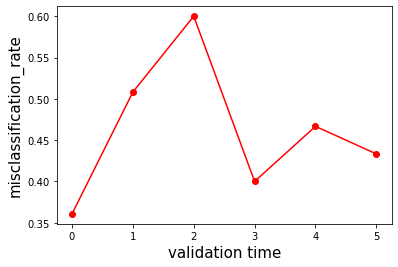

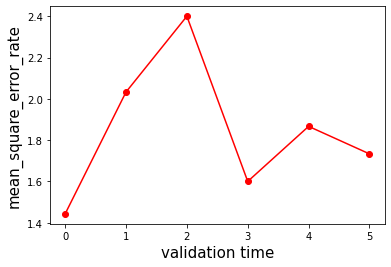

In [26]:
plt.plot(Err_rate,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("misclassification_rate", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()

# Truncated SVD

In [47]:
Err_rate = []
Sq_err = []
Be_rank = []

In [48]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_train[id_train[m]]
    y_train_r = y_train[id_train[m]]
    X_val_r = X_train[id_val[m]]
    y_val_r = y_train[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    U,s,VT = np.linalg.svd(X_train_r,full_matrices=False)
    
    Error_rate_low = 100
    for r in range(len(s)):
        W_SVD = VT.T[:,:(r+1)]@ np.diag(1/s[:(r+1)])@ U.T[:(r+1),:] @ y_train_r
        
        y_hat = np.sign(X_val_r @ W_SVD).reshape(y_val_r.shape[0],1)   
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_rank = r+1
            best_w = W_SVD
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Err_rate.append(err_rate)
    Sq_err.append(sq_err)
    Be_rank.append(best_rank)
    
    print("Validation accuracy:", (1-err_rate)*100,"%")


 iteration 0
Validation accuracy: 59.01639344262295 %

 iteration 1
Validation accuracy: 50.81967213114754 %

 iteration 2
Validation accuracy: 41.666666666666664 %

 iteration 3
Validation accuracy: 51.66666666666666 %

 iteration 4
Validation accuracy: 51.66666666666666 %

 iteration 5
Validation accuracy: 46.666666666666664 %


In [49]:
print("The Truncated SVD result:\n")
print("The error rate of each validation:\n",Err_rate)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best lambda value of each validation:\n",Be_rank)
print("\n")
print("The average number of misclassifications rate:\n",sum(Err_rate)/len(Err_rate))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Truncated SVD result:

The error rate of each validation:
 [0.4098360655737705, 0.4918032786885246, 0.5833333333333334, 0.48333333333333334, 0.48333333333333334, 0.5333333333333333]


The mean squared error of each validation:
 [1.639344262295082, 1.9672131147540983, 2.3333333333333335, 1.9333333333333333, 1.9333333333333333, 2.1333333333333333]


The best lambda value of each validation:
 [4, 1, 6, 2, 2, 2]


The average number of misclassifications rate:
 0.49749544626593806


The mean squared error:
 1.9899817850637522


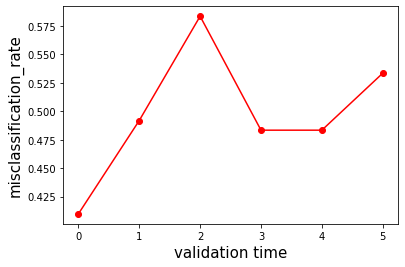

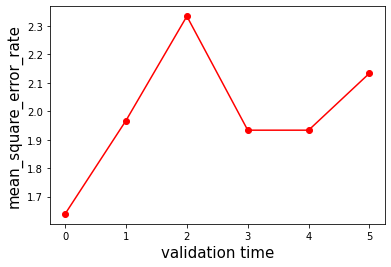

In [50]:
plt.plot(Err_rate,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("misclassification_rate", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()